In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def sample_from_finite_probability_space(finite_prob_space):
    """
    Produces a random outcome from a given finite probability space.

    Input
    -----
    - finite_prob_space: finite probability space encoded as a
      dictionary

    Output
    ------
    - random outcome, which is one of the keys in the
      finite_probability_space dictionary's set of keys
      (remember: these keys form the sample space)
    """

    # first produce a list of pairs of the form (outcome, outcome probability)
    outcome_probability_pairs = list(finite_prob_space.items())


    # convert the pairs into two lists "outcomes" and "outcome_probabilities":
    # - outcomes: list of outcomes
    # - outcome_probabilities: i-th element is the probability of the i-th
    #   outcome in the "outcomes" list
    # (note that this step is needed because NumPy wants these lists
    # separately)
    outcomes, outcome_probabilities = zip(*outcome_probability_pairs)

    # use NumPy to randomly sample
    random_outcome = np.random.choice(outcomes, p=outcome_probabilities)
    return random_outcome

In [3]:
def flip_fair_coin():
    """
    Returns a fair coin flip.

    Output
    ------
    - either the string 'heads' or 'tails'
    """
    finite_prob_space = {'heads': 0.5, 'tails': 0.5}
    return sample_from_finite_probability_space(finite_prob_space)

In [4]:
def flip_fair_coins(number_of_coins):
    """
    Returns a list of fair coin flip results.

    Input
    -----
    - number_of_coins: number of coin flips

    Output
    ------
    - list of length <number_of_coins> consisting of strings 'heads'/'tails'
    """
    finite_prob_space = {'heads': 0.5, 'tails': 0.5}
    return [sample_from_finite_probability_space(finite_prob_space)
            for i in range(number_of_coins)]

In [5]:
def plot_discrete_histogram(array, frequency=False, figsize=(5, 4)):
    """
    Plots a discrete histogram given a 1D array of values.

    Input
    -----
    - array: 1D array consisting of data
    - frequency: boolean (True => plot frequencies, False => plot counts)
    - figsize: tuple (width, height) of how large to make the plotted figure
    """
    array_as_series = pd.Series(array)

    counts = array_as_series.value_counts().sort_index()
    if frequency:
        counts /= counts.sum()

    plt.figure(figsize=figsize)

    plt.xlabel('Value')
    if frequency:
        plt.ylabel('Frequency')
    else:
        plt.ylabel('Count')

    axis = counts.plot(kind='bar')
    figure = axis.get_figure()
    figure.autofmt_xdate()  # rotates x-axis labels to be more readable

    plt.tight_layout()  # tidy up and remove some margins

In [6]:
def print_prob_table_array(probabilities, outcomes):
    """
    Prints a probability table that is stored as a 1D array.
    
    Input
    -----
    - probabilities: a 1D array of nonnegative entries that add to 1
    - outcomes: list of labels; i-th label is for the i-th entry in
      <probabilities>
    """
    if len(probabilities) != len(outcomes):
        raise Exception("The number of outcomes and number of probabilities "
                        + "must match.")
    print(pd.Series(probabilities, outcomes))

In [7]:
def print_joint_prob_table_dict(dicts_in_dict):
    """
    Prints a joint probability table that is stored using the dictionaries
    within a dictionary representation.
    
    Input
    -----
    - dicts_in_dict: joint probability table stored as dictionaries within a
      dictionary
    """
    print(pd.DataFrame(dicts_in_dict).T)

In [8]:
def print_joint_prob_table_array(array, row_labels, col_labels):
    """
    Prints a joint probability table that is stored using the 2D array
    representation.
    
    Input
    -----
    - array: 2D array for the joint probability table (doesn't have label info)
    - row_labels: list of labels; i-th label is for the i-th row in <array>
    - col_labels: list of labels; i-th label is for the i-th column in <array>
    """
    if len(array.shape) != 2:
        raise Exception("The array specified must be two-dimensional.")
    print(pd.DataFrame(array, row_labels, col_labels))

In [9]:
# simulate flipping a fair coin, You should get either 'heads' or 'tails'.
flip_fair_coin()

'heads'

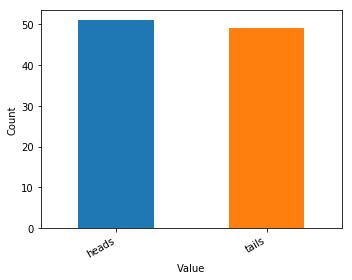

In [10]:
# To flip the fair coin 100 times
flips = flip_fair_coins(100)

# plot how many times we see the two possible outcomes in the same bar graph, called a histogram:
plot_discrete_histogram(flips)

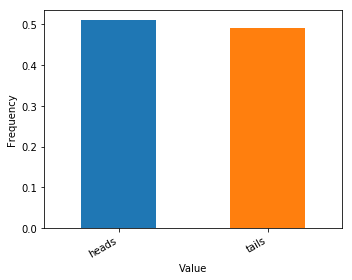

In [11]:
#  plot the fraction of times heads or tails occurred
plot_discrete_histogram(flips, frequency=True)

In [12]:
# Plot the fraction of heads as a function of the number of flips (going up to 100,000 flips).
n = 100000
heads_so_far = 0
fraction_of_heads = []
for i in range(n):
    if flip_fair_coin() == 'heads':
        heads_so_far += 1
    fraction_of_heads.append(heads_so_far / (i+1))

Text(0,0.5,'Fraction of heads')

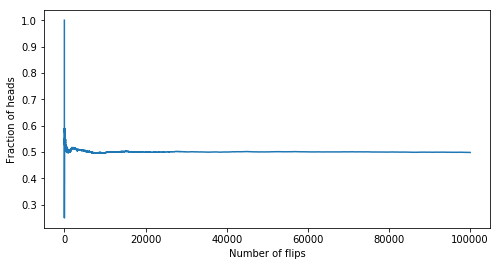

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(range(1, n+1), fraction_of_heads)
plt.xlabel('Number of flips')
plt.ylabel('Fraction of heads')